# Data Mining and Probabilistic Reasoning, WS18/19
Dr. Gjergji Kasneci, The University of Tübingen


## T-Tests

**Date: 19.11.2018**

Teaching Assistant:
* Martin Pawelczyk 
* Note: Please address the questions, which you might have about the material presented here, towards me.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import scipy
from scipy.stats import t # imports t distribution related functions
import matplotlib.pyplot as plt
import random

random.seed(811)

# Review of two-sided t-test's descison rule
For now: Let's concentrate on sample 1.
Do you recall the desicion rule for a one sample t-test with *unknown* mean & variance?
If not, dont worry. Here it is again: 

1. Compute: $$ \hat{\theta} = n^{-1}\sum_{i} x_i $$ $$se(\hat{\theta}) = \sqrt{Var(\hat{\theta})}$$.
2. Compute the test statistic:  $$ W = \frac{\hat{\theta}-\theta}{se(\hat{\theta)}}\sqrt{n} \sim t_{df} $$.
3. Compare W with coresponding critical value for a two sided t-test: $$ |W| > t_{n-1, 1-\alpha}$$ where t_df is the t-distribution with df degrees of freedom, t denotes the percentile of a t-distribution with corresponding (chosen) significance level alpha, sample size n and degrees of freedom (df = n-1, in this case). 

**Q**: 
1. (1) Would it make any difference, if the the value theta was known to us? (2) Alternatively, would it make a difference if the variance of theta was known to us?
2. How would the distribution of the test statistic under the null hyothesis change in cases (1) and (2)? Would it change?
3. How does this test relate to the Wald test?

Let's turn to an actual (simulation) example:


# The Descion Rule

In [2]:
# Data Generating Process (DGP)
n = 50
Sample1 = np.random.normal(0, 1, size = n) # First Sample with mean 0 & standard deviation 1 
Sample2 = np.random.normal(3, 1, size = n) # Second Sample with mean 3 & standard deviation 1; both with sample sizes n_1 = n_2 = 50

# Note: Samples need not be simulated from Normal distribution for this example. 

In [3]:
theta_hat_1 = np.mean(Sample1)
theta_hat_2 = np.mean(Sample2)
# empirical variance
emp_se_1 = np.sqrt(np.var(Sample1))
emp_se_2 = np.sqrt(np.var(Sample2))
# sample variance

# Suppose our hypothesized mean value theta is 0
W_1 = np.sqrt(n)*(theta_hat_1 - 0)/(emp_se_1)
W_2 = np.sqrt(n)*(theta_hat_2 - 0)/(emp_se_1)

# df: degrees of freedom
# Q: What do we need this for?
df = n-1

# obtain 5% and 10% critical values
# Q: Why do we use 0.975 and 0.95 for the 5 and 10 percent critical values, respectively?
t_005 = t.ppf(0.975, df) 
t_010 = t.ppf(0.95, df)

In [4]:
# Print both 
print(W_1)
print(W_2)

-0.6235228265268473
22.628318626811293


In [5]:
# Obtain Descion Rules
# Q: What do we conclude?
desc1 = np.abs(W_1) > t_005
desc2 = np.abs(W_1) > t_010

desc3 = np.abs(W_2) > t_005
desc4 = np.abs(W_2) > t_010

print(desc1, desc2, desc3, desc4)

False False True True


**Q**: What does this tell us?

<function matplotlib.pyplot.show(*args, **kw)>

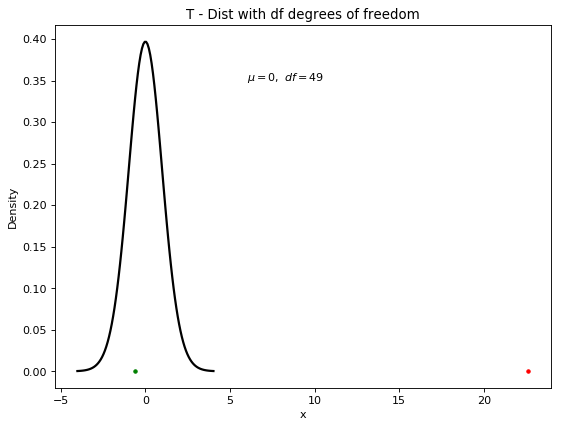

In [6]:
# Let us first get t-dist. with df degrees of freedom
df = n - 1

x = np.linspace(t.ppf(0.0001, df), t.ppf(0.9999, df), 100)
rv = t(df)

plt.figure(figsize=(8,6), dpi=80)
plt.plot(x, rv.pdf(x), 'k-', lw=2) # plot idealized t dist
plt.xlabel('x')
plt.ylabel('Density')
plt.title('T - Dist with df degrees of freedom')
plt.text(6, .35, r'$\mu=0,\ df=49$')

# now we also add the the values from our test-statistics
plt.plot([W_2], [0], marker='o', markersize=3, color="red")
plt.plot([W_1], [0], marker='o', markersize=3, color="green")

# let us now visualize everything: the critical values & the t statistics
plt.show


**Q**: 
1. What are our conclusions?
2. Why did we compare the values of the test statistic with the critical values from the t-distribution? 
3. Why not any other distribution?

# Short Digression: An illustrative Monte Carlo Simulation using the *empirical* variance & *sample* variance formulae -- small sample results

What is a Monte Carlo Simulation?

Think of it as a controlled statistical experiment. While the method vary with respect to different fields, they usually follow a certain pattern (according to [Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method#Applied_statistics)):

1. Define a domain of possible inputs
2. Generate inputs randomly from a probability distribution over the domain
3. Perform a deterministic computation on the inputs
4. Aggregate the results

Our procedure will then be as follows:

1. Here we will generate data from a normal distribution with mean 0 and standard deviation 1 (this step implies 1. and 2. from above)
2. Compute the mean and variance to create the t-statistic (corresponds to step 3).
3. Aggregate the results in a histogram (corresponds to step 4) and compute the empirical size of our test, i.e., how often do we reject the null hypothesis when the null hypothesis is true. 

## Empirical Variance Formula

In [7]:

rep = 2000 # number of repetions in monte carlo simulation

# define sample size
n = 10  # will have an impact on our hypothesis test
df = n - 1
t_975 = t.ppf(0.975, df)
t_025 = t.ppf(0.025, df)

Rule_Count = 0 # will tell us how often we rejected the null hypothesis

W  = list(range(rep)) 

for i in range(rep):
    Sample = np.random.normal(0, 1, size = n) # obtain random sample from normal with mean 1 and sd = 1
    # compute mean
    theta_hat = np.mean(Sample)
    # compute se
    emp_se = np.sqrt(np.var(Sample))
    
    # compute test statistic with hypothetzied value of 0 (this is the value under the null hypothesis)
    Stat = np.sqrt(n)*(theta_hat - 0)/(emp_se)
    # compute descion rule
    Rule = ((Stat > t_025) and (Stat < t_975))*1 # multiplication with 1 turns boolean into numerical

    Rule_Count = Rule_Count + Rule
    emp_size = 1 - Rule_Count/rep # as opposed to nominal size (which we have choosen to be 5 percent here!)
    
    # vectorize test statistics
    W[i] = Stat 
    
print(Rule_Count)
print(emp_size)

1891
0.05449999999999999


**Q**: Can you detect any potential (small) problems with this approach?

## Sample Varianec Formula

In [8]:
# Short Function to compute Sample Variance

#def sample_variance(Sample, n):
 
def Sample_Variance(Sample,theta_hat, n):   
    var = list(range(n))
    
    for i in range(n):
        var[i] = (Sample[i] - theta_hat) ** 2
    s_var = sum(var)/(len(Sample) - 1) # instead of dividing by n we divide by (n-1)
    return s_var
    

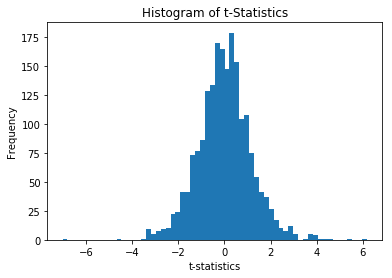

1892
0.05400000000000005


In [9]:
## Short Digression 2 - An illustrative Monte Carlo Simulation: using the sample variance formula

rep = 2000 # number of repetions in monte carlo simulation

Rule_Count = 0 # will tell us how often we rejected the null hypothesis
W  = list(range(rep)) 
for i in range(rep):
    
    Sample = np.random.normal(0, 1, size = n) # obtain random sample from normal with mean 1 and sd = 1
    # compute mean
    theta_hat = np.mean(Sample)
    # compute empirical se
    s_se = np.sqrt(Sample_Variance(Sample, theta_hat, n))

    # compute test statistic with hypothetzied value of 0 (this is the value under the null hypothesis)
    Stat = np.sqrt(n)*(theta_hat - 0)/(s_se)
    # compute descion rule
    Rule = ((Stat > t_025) and (Stat < t_975))*1
    
    Rule_Count = Rule_Count + Rule
    emp_size = 1 - Rule_Count/rep # as opposed to nominal size (which we have choosen to be 5 percent here!)
    
    # vectorize test statistics
    W[i] = Stat    
    
# Plots: Observe that the plot has many more observations in the tails than we would expect under a normal distribution
plt.hist(W, bins='auto')
plt.xlabel('t-statistics')
plt.ylabel('Frequency')
plt.title('Histogram of t-Statistics')
plt.show()

print(Rule_Count)
print(emp_size)

### Main Takeaways
Ask yourself:
1. Whether the means and variances are known or not?; 
2. Which distribution do we get the critical values from?
3. Will the size be under control? (Will it be 5%?)

Next: Let's turn to some real world applicatons. 


# A data application


In [10]:
# Wine
Wine = pd.read_csv("./data/wine_data.csv", delim_whitespace=True)
Wine.head()
Alc_Subset = Wine[['Type', 'Alcohol_(%)']]

red = Alc_Subset.query("Type == 'red' ")
white = Alc_Subset.query("Type == 'white' ")

red_v = red.iloc[:,1] # obtain values
white_v = white.iloc[:,1] # obtain values

red_mean = np.mean(red_v)
white_mean = np.mean(white_v)

var_red = np.var(red_v)
var_white = np.var(white_v)

n_red = len(red_v)
n_white = len(white_v)

print(red_mean, var_red, white_mean, var_white)
print(n_red, n_white)

10.422983114446502 1.1349371715080778 10.514267047770149 1.514117788842735
1599 4898


## Which null hypothesis should we test???
There are several legit null hypotheses we could check. For instance:
1. Are the means different from 10(%)?
2. Are the means greater/smaller than 10(%)?
3. Do the means differ across Red & White wines?

Here we will simply check whether the means are different from 10 percent (1. bullet point).

*Q*: How would you go about testing cases (2) and (3)? Try it yourself! Hint: Case (3) is a bit more tricky! You have to incorporate that the two samples have different sample sizes, different means and different variances!


In [11]:
# Test statistics and descion Rules

# compute test statistics
t_red = np.sqrt(n_red)*(red_mean - 10)/ np.sqrt(var_red)
t_white = np.sqrt(n_white)*(white_mean - 10)/ np.sqrt(var_white)

print(t_red, t_white)

15.876740715972323 29.249487221200948


*Q*: 
1. What do we conclude from these test statistics?  
2. Is there a null hypothesis that would make more sense? How would you test it?
3. Did we expect to arrive at those descions by looking at the sample sizes, variances and means?